In [8]:
import networkx as nx
import pylab as plt
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
A.sum()

0.21230629976529625

In [9]:
 print(A)

[[ 1.         -0.57735027  0.          0.          0.        ]
 [-0.57735027  1.         -0.40824829 -0.40824829  0.        ]
 [ 0.         -0.40824829  1.          0.         -0.5       ]
 [ 0.         -0.40824829  0.          1.         -0.5       ]
 [ 0.          0.         -0.5        -0.5         1.        ]]


In [10]:
from scipy.linalg import expm, sinm, cosm
listexpA = []
for t in range(10):
    expA = expm(-t*A)
    listexpA.append(expA.sum())

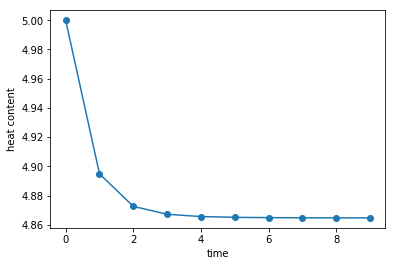

In [11]:
plt.plot(range(10),listexpA,"o-")
plt.xlabel("time")
plt.ylabel("heat content")
plt.show()

In [12]:
#given the Laplacian matrix L, compute the normalised version
def normalised_genlap(L):
    D = np.diagonal(L)                # extract the diagonal elements which correspond to the degree
    D = [pow(d,-0.5) for d in D]      # compute d^(-1/2) for each of the degrees
    D_hf = np.diag(D)                 # form a square matrix D^(-1/2)
    Df = np.matmul(D_hf, L)           # compute D^(-1/2) L
    Ln = np.matmul(Df,D_hf)           # compute D^(-1/2) L D^(-1/2)
    return Ln                         # return normalised Laplacian

In [13]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def kplaplacian_mlf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*s)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

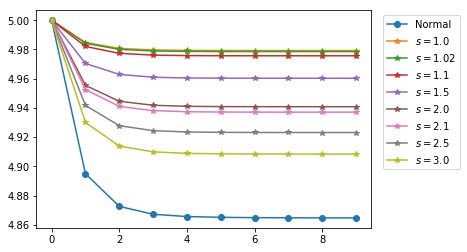

In [23]:
-

In [24]:
#function to compute the laplace based Laplacian matrix for a given value of lambda

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

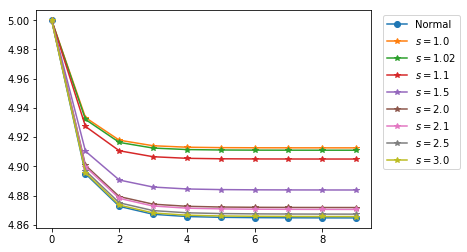

In [25]:
#heatcontent against time for the normal and laplace based generalised normalised laplacian

import networkx as nx
import pylab as plt
import itertools

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
list_norm_genlap = []
time = range(10)


listexpA = []
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Normal']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for lam in lists:
    Ln = normalised_genlap(kplaplacian_ltf(G,lam))        #compute the normalised generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$s=$'+str(lam))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")
        
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.15,1))
plt.show()

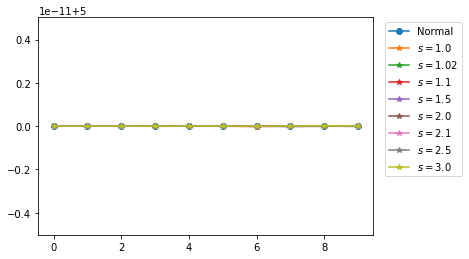

In [26]:
#heatcontent against time for the normal and laplace based generalised normalised laplacian

import networkx as nx
import pylab as plt
import itertools

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
list_norm_genlap = []
time = range(10)


listexpA = []
L = nx.laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Normal']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for lam in lists:
    Ln = kplaplacian_ltf(G,lam)                      #compute the generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$s=$'+str(lam))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")
        
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.15,1))
plt.show()